In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
import numpy as np
from scipy.special import erfc

class Burgers:
    ''' Class to generate analytical solutions of Burgers equation from delta peak. 
    
    Good source: https://www.iist.ac.in/sites/default/files/people/IN08026/Burgers_equation_viscous.pdf'''
    def __init__(self, viscosity, A):
        self.v = viscosity
        self.A = A
    
    
    def solution(self, x, t):
        return self.u(x, t, self.v, self.A)
    
    def library(self, x, t):
        u = self.u(x, t, self.v, self.A)
        u_t = self.u_t(x, t, self.v, self.A)
        u_x = self.u_x(x, t, self.v, self.A)
        u_xx = self.u_xx(x, t, self.v, self.A)
        u_xxx = self.u_xxx(x, t, self.v, self.A)
  
        derivs = np.concatenate([np.ones_like(u), u_x, u_xx, u_xxx], axis=1)
        theta = np.concatenate([derivs, u * derivs, u**2 * derivs], axis=1)

        return u_t, theta
    
    @staticmethod
    def u(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        solution = np.sqrt(v/t) * ((np.exp(R) - 1) * np.exp(-z**2)) / (np.sqrt(np.pi) + (np.exp(R) - 1)*np.sqrt(np.pi/2)*erfc(z))
        return solution
    
    @staticmethod
    def u_x(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = 1/np.sqrt(4*v*t) * (np.sqrt(2*t/v)*u**2-2*z*u)
        return u_x
    
    @staticmethod
    def u_xx(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = Burgers.u_x(x, t, v, A)
        u_xx = 1/np.sqrt(4*v*t) * (-2*u/np.sqrt(4*v*t) - 2*z*u_x + 2*np.sqrt(2*t/v)*u*u_x) # could be written shorter, but then get NaNs due to inversions
        return u_xx
    
    @staticmethod
    def u_xxx(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = Burgers.u_x(x, t, v, A)
        u_xx = Burgers.u_xx(x, t, v, A)
        u_xxx = 1/np.sqrt(4*v*t) * (-4/np.sqrt(4*v*t) * u_x + 2 *np.sqrt(2*t/v)*u_x**2 + u_xx*(-2*z+2*np.sqrt(2*t/v)*u)) # could be written shorter, but then get NaNs due to inversions
        return u_xxx
    
    @staticmethod
    def u_t(x, t, v, A):
        R = A/(2*v)
        z = x/np.sqrt(4*v*t)
        
        u = Burgers.u(x, t, v, A)
        u_x = Burgers.u_x(x, t, v, A)
        u_xx = 1/np.sqrt(4*v*t) * (-2*u/np.sqrt(4*v*t) - 2*z*u_x + 2*np.sqrt(2*t/v)*u*u_x)
        u_t = v * u_xx - u *u_x
        return u_t

In [272]:
x = np.linspace(-5, 5, 1000)
t = np.linspace(1e-4, 5, 1000)

x_grid, t_grid = np.meshgrid(x, t, indexing='ij')

A = 1
viscosity = 0.1

In [273]:
burgers = Burgers(viscosity, A)

In [274]:
sol = burgers.solution(x_grid, t_grid)

In [275]:
sol.shape

(1000, 1000)

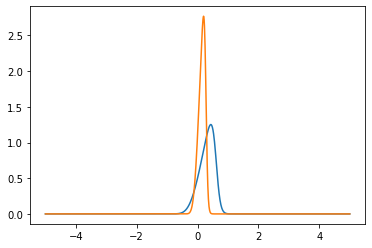

In [276]:
plt.plot(x, sol[:, 49])
plt.plot(x, sol[:, 10])

In [277]:
sol_x = burgers.u_x(x_grid, t_grid, viscosity, A)

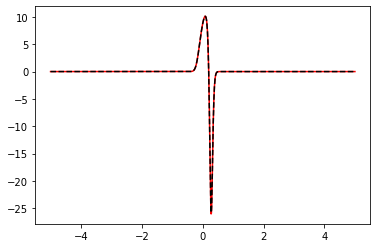

In [278]:
frame = 10
plt.plot(x, sol_x[:, frame], 'r')
plt.plot(x, np.gradient(sol[:, frame], x), 'k--')

In [279]:
(sol_x - np.gradient(sol, x, axis=0))[1:-1]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.94457931e-10, -3.97965868e-10, -4.01496359e-10],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.11964726e-10, -4.15607271e-10, -4.19273039e-10],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.30198537e-10, -4.33980332e-10, -4.37786034e-10],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.00593711e-08,  9.08503284e-08,  9.16462696e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.62449643e-08,  8.70068594e-08,  8.77735968e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.25823931e-08,  8.33161893e-08,  8.40546893e-08]])

In [280]:
sol_xx = burgers.u_xx(x_grid, t_grid, viscosity, A)

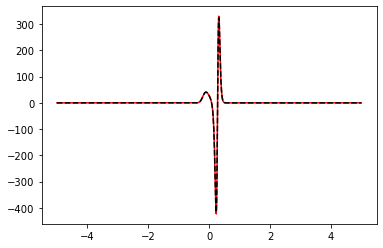

In [281]:
frame = 10
plt.plot(x, sol_xx[:, frame], 'r')
plt.plot(x, np.gradient(sol_x[:, frame], x), 'k--')

In [282]:
sol_xxx = burgers.u_xxx(x_grid, t_grid, viscosity, A)

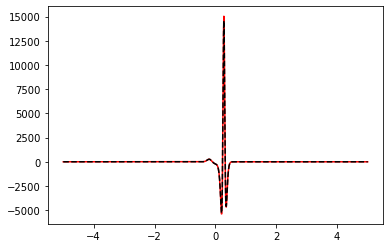

In [283]:
frame = 10
plt.plot(x, sol_xxx[:, frame], 'r')
plt.plot(x, np.gradient(sol_xx[:, frame], x), 'k--')

In [284]:
sol_t = burgers.u_t(x_grid, t_grid, viscosity, A)

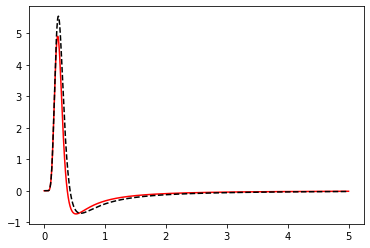

In [285]:
x_slice = 566
plt.plot(t, sol_t[x_slice, :], 'r')
plt.plot(t, np.gradient(sol[x_slice, :], t), 'k--')

In [286]:
np.allclose(sol_t[1:-1, 1:-1], np.gradient(sol, t, axis=1)[1:-1, 1:-1], atol=1e-5)

False

In [287]:
np.argmax(np.abs(sol_t[4:-4, 4:-4] - np.gradient(sol, t, axis=1)[4:-4, 4:-4]))

506912

In [288]:
np.unravel_index(23772, sol_t[4:-4, 4:-4].shape)

(23, 956)

In [290]:
from DeePyMoD_SBL.data import Burgers